# Week 4 Part 1

# A description of the problem and a discussion of the background. (15 marks)

2019-nCoV is one of the most hottest topic recently around the world. It came from the ongoing 2019–20 Wuhan coronavirus outbreak. A virus that was currently spreading across the world, majorly in US, Italy, UK, and Spain. Canada is also one of them as well. The genomic sequencing has shown that the coronavirus is a positive-sense, single-stranded RNA coronavirus.It has been confirmed that it primarily spreded by Human-to-human transmission and spread through close contact, in particular from coughs and sneezes within a range of about 6 feet. It is possible that the virus can be infectious even during the incubation period, that might explain why the outbreak has so much population get infected in China intially.
How do we utilize the current data to get more information about what we need to make this outbreak become better?

# A description of the data and how it will be used to solve the problem. (15 marks)

In this report, sets of the data about corona virus will be analyzed. The dataset is called “Novel Corona Virus 2019 Dataset” and it was published on Kaggle. It has been collected by the John Hopkins University from various sources such as WHO, local CDC and some other medias. The dataset includes few features like below: 'Province/State', 'Country/Origin', "Number of Confirmed Cases', 'Number of Cured','Latitude' and 'Longitude'.The report will be interested in 5 variables: date, number of infected, fatalities and cured in a given region, and 'Country/Origin'.

# Part 2

A link to your Notebook on your Github repository, showing your code. (15 marks)
https://github.com/YaranN/Coursera_Capstone/blob/master/Corona_Virus.ipynb

# Report

# Introduction 
This report will illustrate how much populations in the cities are confirmed with '2019-nCOV' virus. As we all know, Hubei is the city that get infected the most. What cities are also in the risk of getting infection. Can we have a trend to predict when the virus can be controled based on current data?  

# Data
The data will be used in this report is coming from Kaggle and the source link if from https://www.kaggle.com/rajacsp/toronto-apartment-price/.

Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

Results section where you discuss the results.

Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.

Conclusion section where you conclude the report.


In [39]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Dataset 1: Total Cases in Ontario

In [52]:
# Read data of total number of cases in Ontario 
df_CanONTotal = pd.read_csv("https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv")
df_CanONTotal.shape
df_CanONTotal = df_CanONTotal.tail(14)
df_CanONTotal= df_CanONTotal.drop(['Presumptive Negative','Presumptive Positive'], axis = 1)
df_CanONTotal['Reported Date']=pd.to_datetime(df_CanONTotal['Reported Date'])
df_CanONTotal


,Reported Date,Confirmed Negative,Under Investigation,Confirmed Positive,Resolved,Deaths,Total patients approved for testing as of Reporting Date,Total Cases,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
44,2020-03-21,15768.0,7239,369.0,6.0,2.0,23384.0,377.0,NaN,NaN,NaN
45,2020-03-22,17634.0,8361,412.0,8.0,5.0,26420.0,425.0,NaN,NaN,NaN
46,2020-03-23,19586.0,8417,489.0,8.0,6.0,28506.0,503.0,NaN,NaN,NaN
47,2020-03-24,21795.0,10074,572.0,8.0,8.0,32457.0,588.0,NaN,NaN,NaN
48,2020-03-25,24458.0,10489,667.0,8.0,13.0,35635.0,688.0,NaN,NaN,NaN
49,2020-03-26,26727.0,10965,835.0,8.0,15.0,38550.0,858.0,NaN,NaN,NaN
50,2020-03-27,29967.0,10074,967.0,8.0,18.0,41032.0,993.0,NaN,NaN,NaN
51,2020-03-28,33240.0,8690,1117.0,8.0,19.0,43072.0,1144.0,NaN,NaN,NaN
52,2020-03-29,40630.0,7203,1324.0,8.0,23.0,49186.0,1355.0,NaN,NaN,NaN
53,2020-03-30,NaN,5651,1252.0,431.0,23.0,48461.0,1706.0,NaN,NaN,NaN


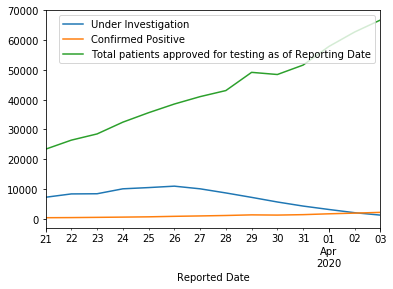

In [65]:
df_CanONTotal.plot.line(x='Reported Date', y=['Under Investigation','Confirmed Positive','Total patients approved for testing as of Reporting Date'])

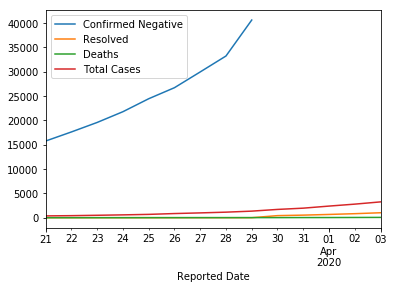

In [66]:
df_CanONTotal.plot.line(x='Reported Date', y=['Confirmed Negative']['Resolved','Deaths','Total Cases'])

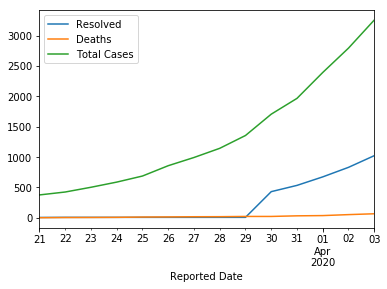

In [67]:
df_CanONTotal.plot.line(x='Reported Date', y=['Resolved','Deaths','Total Cases'])

# Dataset 2: Total confirmed patients data

In [40]:
df_CanONConfirm = pd.read_csv("https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv")
total_patient = df_CanONConfirm['ROW_ID'].count()
total_patient

2793

In [41]:
 df_CanONConfirm['CLIENT_GENDER'].value_counts()
    

FEMALE         1421
MALE           1355
UNKNOWN          16
TRANSGENDER       1
Name: CLIENT_GENDER, dtype: int64

ValueError: color kwarg must have one color per data set. 428 data sets and 1 colors were provided

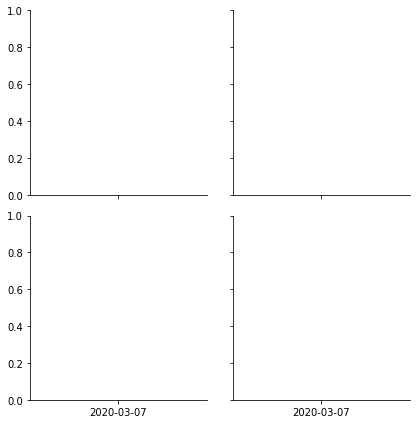

In [50]:
import seaborn as sns

bins = np.linspace(0,total_patient/2, 10)

g = sns.FacetGrid(df_CanONConfirm, col="CLIENT_GENDER", hue="RESOLVED", palette="Set3", col_wrap=2)
g.map(plt.hist, 'ACCURATE_EPISODE_DATE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [34]:
df_CanONConfirm.head()

,ROW_ID,ACCURATE_EPISODE_DATE,Age_Group,CLIENT_GENDER,CASE_ACQUISITIONINFO,RESOLVED,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-03-07,40s,MALE,Neither,Yes,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
1,2,2020-03-08,20s,MALE,Neither,Yes,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
2,3,2020-03-10,40s,FEMALE,Neither,Yes,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
3,4,2020-03-11,50s,FEMALE,Neither,Yes,Middlesex-London Health Unit,50 King Street,London,N6A 5L7,www.healthunit.com,42.981468,-81.254016
4,5,2020-03-15,50s,MALE,Neither,Yes,"Region of Waterloo, Public Health",99 Regina Street South,Waterloo,N2J 4V3,www.chd.region.waterloo.on.ca,43.462876,-80.520913
